In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta
from keras.losses import SparseCategoricalCrossentropy
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

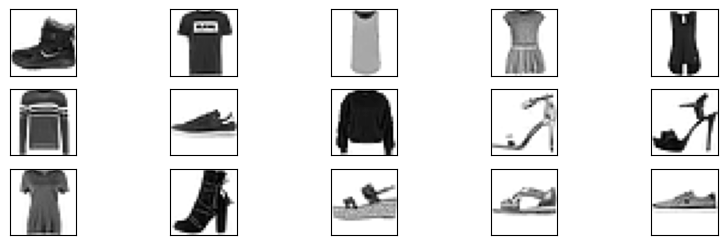

In [4]:
plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)

plt.show()

In [15]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(200, activation='relu'))
#model.add(Dropout(0.3))



model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 200)               157000    
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159010 (621.13 KB)
Trainable params: 159010 (621.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [16]:
#model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
#model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [17]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5057 - accuracy: 0.8222 - precision_2: 0.8698 - recall_2: 0.7704 - val_loss: 0.4350 - val_accuracy: 0.8363 - val_precision_2: 0.8776 - val_recall_2: 0.7909
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3781 - accuracy: 0.8621 - precision_2: 0.8905 - recall_2: 0.8341 - val_loss: 0.3805 - val_accuracy: 0.8572 - val_precision_2: 0.8883 - val_recall_2: 0.8291
Epoch 3/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3371 - accuracy: 0.8774 - precision_2: 0.9021 - recall_2: 0.8547 - val_loss: 0.3368 - val_accuracy: 0.8773 - val_precision_2: 0.9008 - val_recall_2: 0.8562
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3107 - accuracy: 0.8863 - precision_2: 0.9076 - recall_2: 0.8655 - val_loss: 0.3373 - val_accuracy: 0.8766 - val_precision_2: 0.8983 - val_recall_2: 0.8558
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/s

In [18]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8832 - precision_2: 0.8977 - recall_2: 0.8714


[0.34190720319747925, 0.8831999897956848, 0.897702693939209, 0.871399998664856]

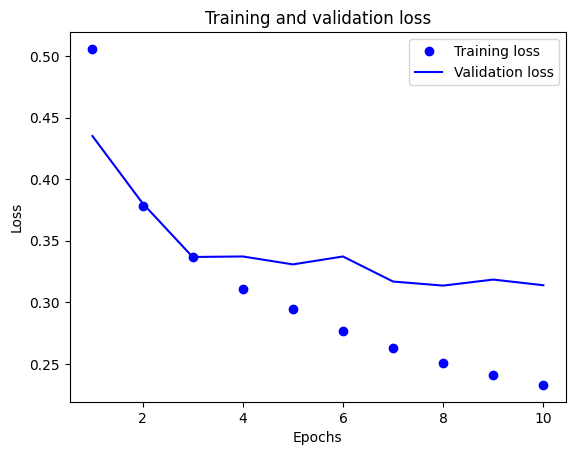

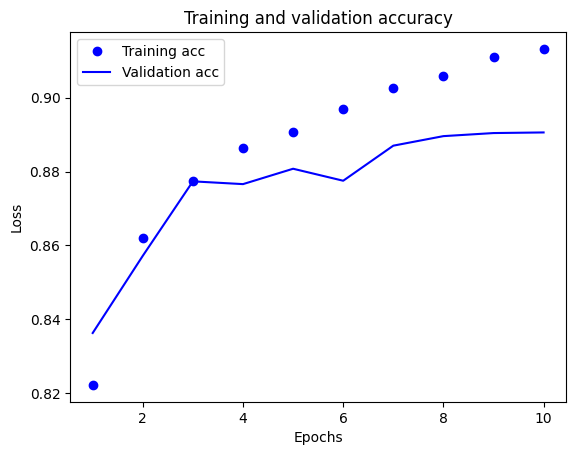

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()